# Group Assignment 3
## A "Functional" Notebook
Name: Jiaming Zhu

Description: A clean verison of midterm. Add function and loop. This notebook expore dataset of public transit safety events in LA from 2018 to 2022 and census dataset of household income in Los Angeles region. Tend to find distribution characteristic of public transit safety events, and the relationship between traffic accidents household income.

## Importing Data
Importing libraries and dataset, check the data information. In this part, I will check the basic information of public transit safety events in LA.

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# read and add shapefile to notebook
file = gpd.read_file('Data/Major_Safety_Events.csv')
file

,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,Type of Service,Fixed Route Flag,Year,Event Description,...,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Total Serious Injuries,Person List,United States,US Counties,geometry
0,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2023,{Redacted} {Redacted} investigation revealed t...,...,0,0,0,0,0,0,,6,2090,None
1,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2023,Bus operator hit the brakes hard to avoid a ve...,...,0,0,0,0,0,0,I Passenger Senior Citizen (61 and up) F ; ...,6,2090,None
2,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2022,Suspect assaulted victim while riding the bus ...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M,6,2090,None
3,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2022,{Redacted} was attacked by suspect while ridin...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M Y,6,2090,None
4,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2022,{Redacted} was attacked by suspect while ridin...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M Y,6,2090,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2014,{Redacted} was standing on the south side of t...,...,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) M,,,None
2250,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2014,The victim was riding her bicycle by the {Reda...,...,0,0,0,0,0,0,I Wait Leave Teen (13 to 18) F,,,None
2251,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2014,{Redacted} ( Bus ) EB # {Redacted} lane of {Re...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) F ; I Passe...,,,None
2252,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2014,A {Redacted} ) was at {Redacted} {Redacted} tr...,...,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) F,,,None


In [4]:
# show data type for each column
file.dtypes

NTD ID                      object
Agency                      object
Primary UZA UACE Code       object
Rail/Bus/Ferry              object
Mode Name                   object
                            ...   
Total Serious Injuries      object
Person List                 object
United States               object
US Counties                 object
geometry                  geometry
Length: 110, dtype: object

In [5]:
# dataset info
file.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Columns: 110 entries, NTD ID to geometry
dtypes: geometry(1), object(109)
memory usage: 1.9+ MB


## Trimming Data
Trimming the dataset, only keep the columns that I want to use. Delete the data with empty value, and only keep data from 2018 to 2022.

In [12]:
# list of desired column names
desired_columns =['Mode Name','Mode','Year','Event Type Group','Latitude','Longitude','LatLon']

In [13]:
# trimming the dataset
data_trimmed = file[desired_columns].copy()
data_trimmed

,Mode Name,Mode,Year,Event Type Group,Latitude,Longitude,LatLon
0,Light Rail,LR,2023,Collision,34.03336,-118.16377,POINT (-118.16377 34.03336)
1,Bus,MB,2023,Other,34.02805,-118.21938,POINT (-118.21938 34.02805)
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
...,...,...,...,...,...,...,...
2249,Light Rail,LR,2014,Assault,,,
2250,Bus,MB,2014,Security,,,
2251,Bus,MB,2014,Collision,,,
2252,Light Rail,LR,2014,Security,,,


In [14]:
# show rows that Latitude is not empty
data_trimmed[data_trimmed.Latitude != '']

,Mode Name,Mode,Year,Event Type Group,Latitude,Longitude,LatLon
0,Light Rail,LR,2023,Collision,34.03336,-118.16377,POINT (-118.16377 34.03336)
1,Bus,MB,2023,Other,34.02805,-118.21938,POINT (-118.21938 34.02805)
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
...,...,...,...,...,...,...,...
2020,Light Rail,LR,2015,Collision,34.03998,-118.266814,POINT (-118.266814 34.03998)
2021,Heavy Rail,HR,2015,Security,34.1011194,-118.3258063,POINT (-118.3258063 34.1011194)
2027,Bus,MB,2015,Collision,34.0436431,-118.3089835,POINT (-118.3089835 34.0436431)
2039,Light Rail,LR,2015,Collision,34.03104,-118.264604,POINT (-118.264604 34.03104)


In [15]:
# show data only from 2018 to 2022
data_trimmed[data_trimmed['Year'].isin(['2018', '2019', '2020', '2021', '2022'])]

,Mode Name,Mode,Year,Event Type Group,Latitude,Longitude,LatLon
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
5,Bus,MB,2022,Assault,33.975102,-118.123203,POINT (-118.123203 33.975102)
6,Light Rail,LR,2022,Assault,33.933595,-118.352083,POINT (-118.352083 33.933595)
...,...,...,...,...,...,...,...
1213,Light Rail,LR,2018,Assault,33.84731,-118.211014,POINT (-118.211014 33.84731)
1270,Bus,MB,2018,Collision,34.149178,-118.469125,POINT (-118.469125 34.149178)
1289,Bus,MB,2018,Collision,34.04727,-118.291621,POINT (-118.291621 34.04727)
1298,Bus,MB,2018,Collision,34.047254,-118.246203,POINT (-118.246203 34.047254)


In [16]:
# trimming the dataset
new_data_trimmed = data_trimmed[data_trimmed['Year'].isin(['2018', '2019', '2020', '2021', '2022'])].copy()
new_data_trimmed

,Mode Name,Mode,Year,Event Type Group,Latitude,Longitude,LatLon
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
5,Bus,MB,2022,Assault,33.975102,-118.123203,POINT (-118.123203 33.975102)
6,Light Rail,LR,2022,Assault,33.933595,-118.352083,POINT (-118.352083 33.933595)
...,...,...,...,...,...,...,...
1213,Light Rail,LR,2018,Assault,33.84731,-118.211014,POINT (-118.211014 33.84731)
1270,Bus,MB,2018,Collision,34.149178,-118.469125,POINT (-118.469125 34.149178)
1289,Bus,MB,2018,Collision,34.04727,-118.291621,POINT (-118.291621 34.04727)
1298,Bus,MB,2018,Collision,34.047254,-118.246203,POINT (-118.246203 34.047254)


In [17]:
# check the data type of each columns
data_trimmed.dtypes

Mode Name           object
Mode                object
Year                object
Event Type Group    object
Latitude            object
Longitude           object
LatLon              object
dtype: object

In [18]:
# covert Latitude and Longitude from object to float
new_data_trimmed['Latitude']= new_data_trimmed.Latitude.astype(float)
new_data_trimmed['Longitude']= new_data_trimmed.Longitude.astype(float)

In [19]:
# convert object to WKT strings
new_data_trimmed['LatLon'] = new_data_trimmed['LatLon'].apply(lambda x: x.wkt if hasattr(x, 'wkt') else x)

In [20]:
# convert object to geometry for column LatLon
from shapely.geometry import Point
from shapely import wkt
new_data_trimmed['geometry'] = new_data_trimmed['LatLon'].apply(wkt.loads)
gnew_data_trimmed = gpd.GeoDataFrame(new_data_trimmed, geometry='geometry')

In [21]:
# check data type of each column again
gnew_data_trimmed.dtypes

Mode Name             object
Mode                  object
Year                  object
Event Type Group      object
Latitude             float64
Longitude            float64
LatLon                object
geometry            geometry
dtype: object

## Plot Histogram
After importing and trimming the dataset, I want to plot the number of safety events happened based on mode type, event type, and year.

In [22]:
# count the number of major safety events for each mode type after trimmed data
gnew_data_trimmed['Mode Name'].value_counts()

Mode Name
Bus                  525
Light Rail           405
Heavy Rail           108
Bus Rapid Transit     11
Vanpool                3
Name: count, dtype: int64

In [23]:
# save it as a variable
line_count1 = gnew_data_trimmed['Mode Name'].value_counts()
line_count1

Mode Name
Bus                  525
Light Rail           405
Heavy Rail           108
Bus Rapid Transit     11
Vanpool                3
Name: count, dtype: int64

In [24]:
# convert the series into a dataframe
line_count1 = line_count1.reset_index()
line_count1

,Mode Name,count
0,Bus,525
1,Light Rail,405
2,Heavy Rail,108
3,Bus Rapid Transit,11
4,Vanpool,3


In [25]:
# rename columns
line_count1.columns = ['Mode Type', 'Number of Accidents']
line_count1

,Mode Type,Number of Accidents
0,Bus,525
1,Light Rail,405
2,Heavy Rail,108
3,Bus Rapid Transit,11
4,Vanpool,3


<Axes: title={'center': 'Number of Accidents for Each Mode Type, 2018-2022'}, xlabel='Mode Type'>

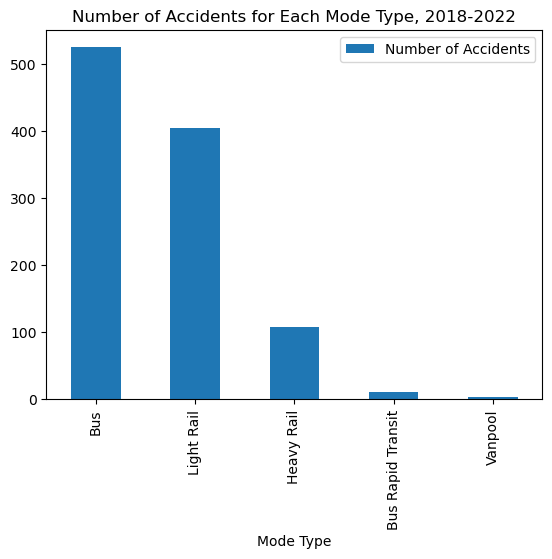

In [26]:
# plot the number of major events for each mode type
line_count1.plot.bar(x = 'Mode Type', y = 'Number of Accidents', title = 'Number of Accidents for Each Mode Type, 2018-2022')

In [27]:
# count the number of major safety events for each event type
gnew_data_trimmed['Event Type Group'].value_counts()

Event Type Group
Collision     590
Assault       411
Security       35
Fire            7
Derailment      5
Other           4
Name: count, dtype: int64

In [28]:
# save it as a variable
line_count2 = gnew_data_trimmed['Event Type Group'].value_counts()
# convert the series into a dataframe
line_count2 = line_count2.reset_index()
# rename columns
line_count2.columns = ['Event Type', 'Number of Accidents']
line_count2

,Event Type,Number of Accidents
0,Collision,590
1,Assault,411
2,Security,35
3,Fire,7
4,Derailment,5
5,Other,4


<Axes: title={'center': 'Number of Accidents for Each Event Type, 2018-2022'}, xlabel='Event Type'>

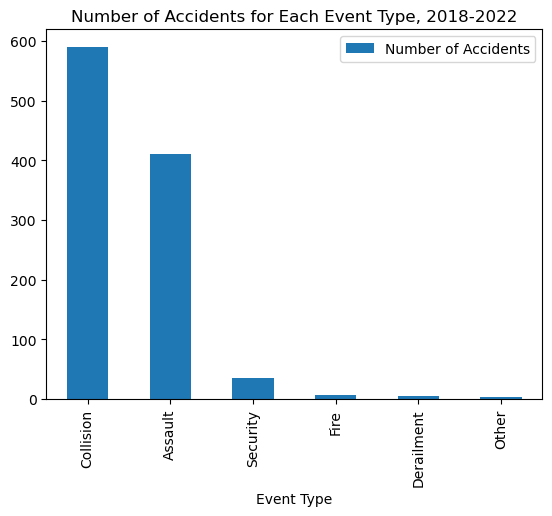

In [29]:
# plot the number of major events for each event type
line_count2.plot.bar(x = 'Event Type', y = 'Number of Accidents', title = 'Number of Accidents for Each Event Type, 2018-2022')

In [30]:
# count the number of major safety events for each year
gnew_data_trimmed['Year'].value_counts()
line_count3 = gnew_data_trimmed['Year'].value_counts()
# convert the series into a dataframe
line_count3 = line_count3.reset_index()
line_count3

,Year,count
0,2022,258
1,2018,226
2,2021,220
3,2019,207
4,2020,141


In [31]:
# reorder the column, make it as 2018 to 2022
order = ['2018', '2019', '2020', '2021', '2022']
line_count3['Year'] = pd.Categorical(line_count3['Year'], categories=order, ordered=True)
line_count3 = line_count3.sort_values('Year')
line_count3

,Year,count
1,2018,226
3,2019,207
4,2020,141
2,2021,220
0,2022,258


In [32]:
# rename columns
line_count3.columns = ['Year', 'Number of Accidents']
line_count3

,Year,Number of Accidents
1,2018,226
3,2019,207
4,2020,141
2,2021,220
0,2022,258


<Axes: title={'center': 'Number of Accidents for Each Year, 2018-2022'}, xlabel='Year'>

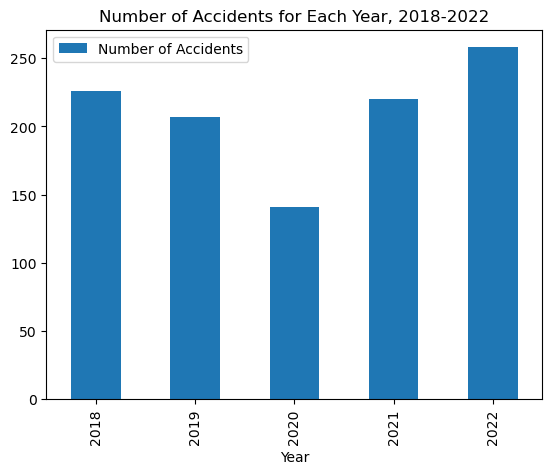

In [33]:
# plot the number of major events for each year
line_count3.plot.bar(x = 'Year', y = 'Number of Accidents', title = 'Number of Accidents for Each Year, 2018-2022')

After trimming the data, we plot three figures to explore the public transis accidents. Based on the figures, we found that bus and light rail system have the most accidents. Collisions and assaults are the most likely types of public transit accidents. 2022 has the most number of accidents and 2020 has the lest number of accidents, may due to the COVID-19. 

## Plot Bar Chart
In this part, we want to plot better bar chart to combine year and mode type.

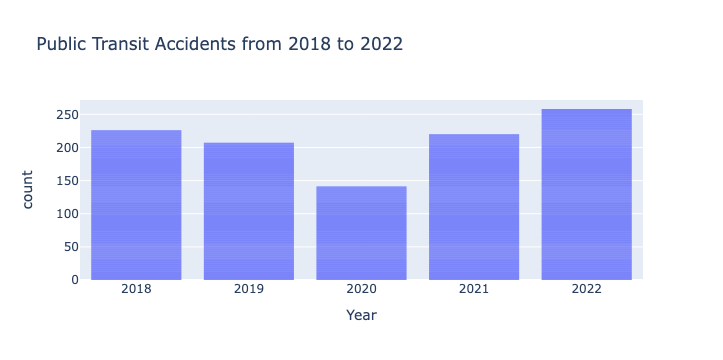

In [37]:
import pandas as pd
import plotly.express as px

# define the desired order for the years
order = ['2018', '2019', '2020', '2021', '2022']

# make sure the 'Year' column to match the sorting order
gnew_data_trimmed['Year'] = gnew_data_trimmed['Year'].astype(str)

# sort the column based on defined order
gnew_data_trimmed['Year'] = pd.Categorical(gnew_data_trimmed['Year'], categories=order, ordered=True)
gnew_data_trimmed = gnew_data_trimmed.sort_values('Year')

# plot bar chart
fig = px.bar(gnew_data_trimmed,
             x='Year',
             title='Public Transit Accidents from 2018 to 2022')

fig.update_traces(marker_line_width=0)

# show the bar chart
fig.show()

In [38]:
# the distribution of accident mode types per year
year_mode = gnew_data_trimmed.value_counts(['Year','Mode Name']).reset_index(name='count')
year_mode

,Year,Mode Name,count
0,2022,Bus,136
1,2018,Bus,112
2,2019,Bus,110
3,2021,Bus,100
4,2022,Light Rail,100
5,2021,Light Rail,88
6,2018,Light Rail,83
7,2019,Light Rail,75
8,2020,Bus,67
9,2020,Light Rail,59


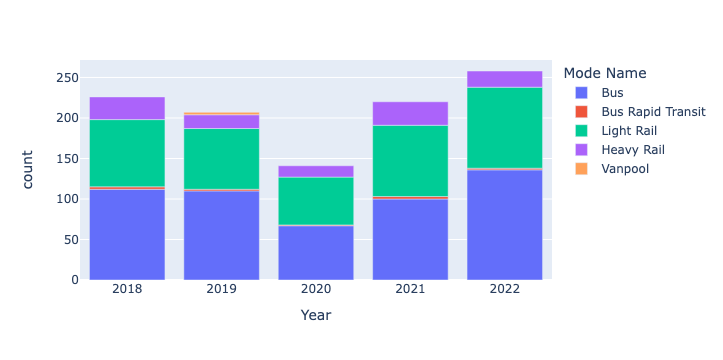

In [39]:
# define order again
order = ['2018', '2019', '2020', '2021', '2022']

# make the 'Year' column to match the order
year_mode['Year'] = year_mode['Year'].astype(str)

# sort the column based on the defined order
year_mode['Year'] = pd.Categorical(year_mode['Year'], categories=order, ordered=True)
year_mode = year_mode.sort_values('Year')

# make a stacked bar chart
fig = px.bar(year_mode,
       x='Year',
       y='count',
       color='Mode Name' 
)

fig.show()

Plot the bar chart for public transit accidents data in LA was almost done. In each year, bus and light system happend most accidents, which is make sense. Because bus and light rail system has the most ridership and most number of routes. Vanpool only has serval accidents each year in LA, because this is a new type of public transit, not many people have chosen this travel mode yet. 2020 has the least number of accidents, which may due to COVID-19 that people reduce the number of trips and company also cut the service. 2022 has the most number of public transit accidents in recent five years, because this is the first year after pendamic. 

## Plot Data Geometry
Plot public transit accidents data on map

In [34]:
# output the data's projection
gnew_data_trimmed.crs

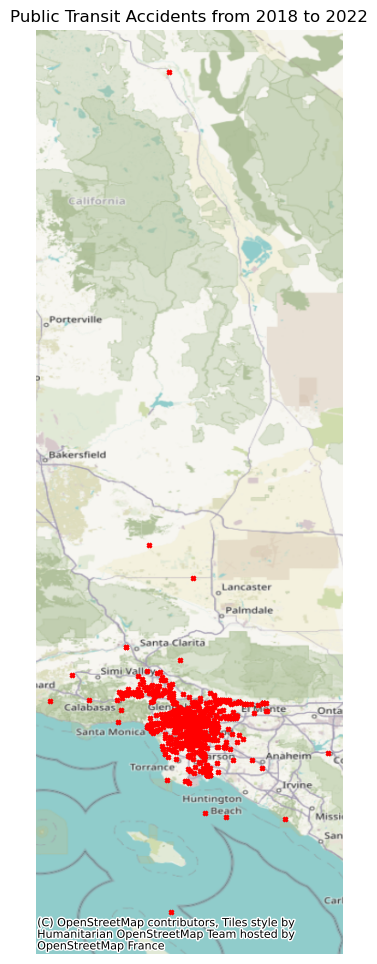

In [51]:
import matplotlib.pyplot as plt
import contextily as ctx

def plot_public_transit_accidents(data, figsize=(12, 12), marker='X', markersize=10, color='red', title='Public Transit Accidents from 2018 to 2022', crs='EPSG:4326'):

    fig, ax = plt.subplots(figsize=figsize)

    # add the data to the plot
    data.plot(ax=ax, marker=marker, markersize=markersize, color=color)

    # turn the axes off
    ax.axis('off')

    # give it a title
    ax.set_title(title)

    # add a basemap
    ctx.add_basemap(ax, crs=crs)

    plt.show()

plot_public_transit_accidents(gnew_data_trimmed)

## Plot Data Based on Year
Plot the accidents happened based on each year, using loop.

In [40]:
# create a list of routes
years = ["2018","2019","2020","2021","2022"]

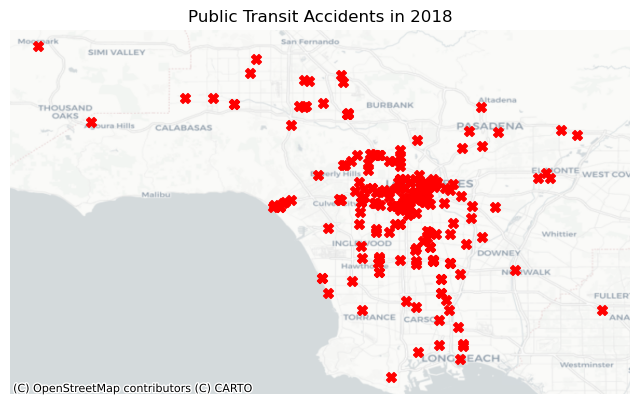

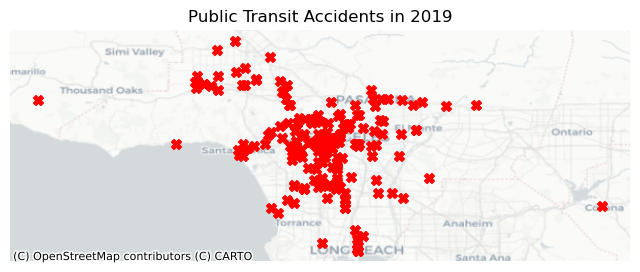

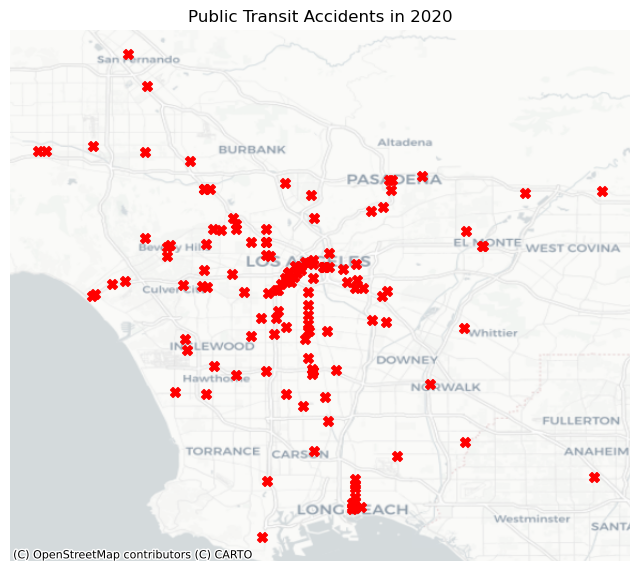

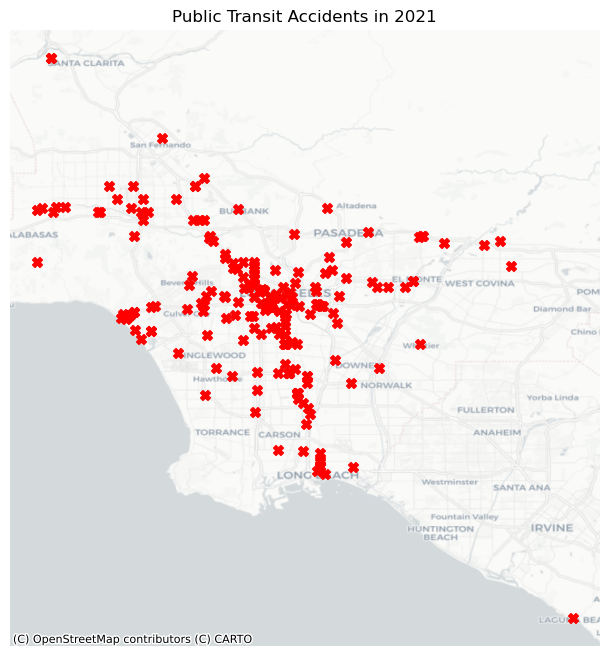

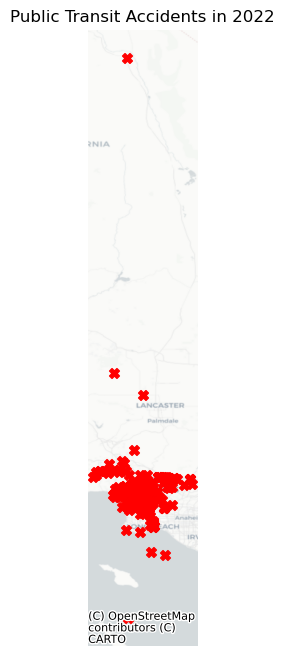

In [41]:
# loop through year
for Year in years:

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    gnew_data_trimmed[gnew_data_trimmed.Year == Year].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    # no axes
    ax.axis('off')

    # title
    ax.set_title('Public Transit Accidents in '+str(Year))

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

In these maps, we can clear see that 2020 has the least number of public transit accidents and 2022 has the most number of public transit accidents.

## Plotly Map
Plot public transit accidents data in interactive map

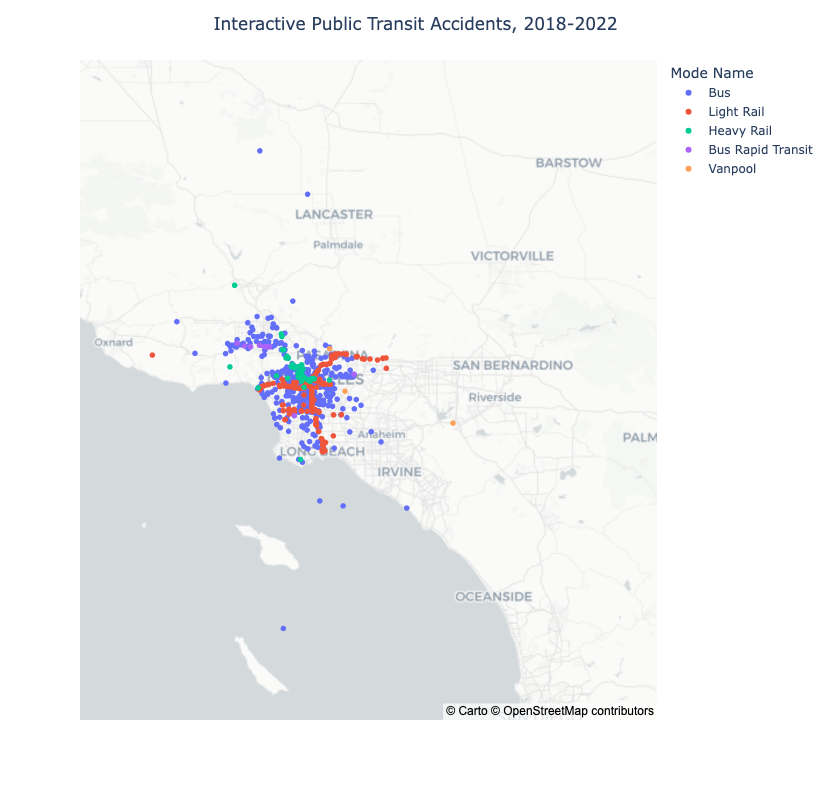

In [52]:
import plotly.express as px

def public_transit_accident_map(data, latitude="Latitude", longitude="Longitude", color="Mode Name", labels={'Year':'Mode Name'}, mapbox_style="carto-positron", width=800, height=800, title="Interactive Public Transit Accidents, 2018-2022", title_x=0.5):

    fig = px.scatter_mapbox(data, 
                            lat=latitude, 
                            lon=longitude, 
                            color=color,
                            labels=labels,
                            mapbox_style=mapbox_style)
    
    # options on the layout
    fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Public Transit Accidents, 2018-2022",
    title_x=0.5 # aligns title to center
    )

    fig.show()
public_transit_accident_map(gnew_data_trimmed)

The interactive map looks good. It shows every public transit accidents happened from 2018 to 2022. Different color represented different mode type. In this map, we can see that most accidents happened in central area, like downtown LA. 

## Census Data Exploration
In this part, we will explore household income census data.

In [2]:
# read and add shapefile to notebook
df = pd.read_csv('Data/R13559086_SL140.csv')

Because we already look the basic information for this dataset in Week3, so at this time, we skip these steps.

In [3]:
# try to see all the data and display a sample row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
65,6037108101,"Census Tract 1081.01, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,NaN,NaN,108101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1081.01,NaN,NaN,NaN,762,22,27,7,0,18,7,20,0,16,20,55,62,38,89,96,285,2.89,3.54,0.92,0.0,2.36,0.92,2.62,0.0,2.1,2.62,7.22,8.14,4.99,11.68,12.6,37.4,117,264,381


In [4]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'Data/R13559086_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [5]:
# check data again
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.10,NaN,NaN,NaN,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,4.32,6.19,2.13,4.64,0.71,5.03,1.23,3.61,6.19,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.22,NaN,NaN,NaN,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,6.07,0.00,0.51,3.18,1.45,2.10,0.00,0.29,0.72,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.20,NaN,NaN,NaN,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,6.30,4.52,0.67,6.75,1.78,1.78,5.26,2.89,4.45,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.21,NaN,NaN,NaN,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,5.90,6.32,4.14,9.55,1.83,7.51,0.63,6.39,4.56,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.22,NaN,NaN,NaN,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,7.33,19.61,6.47,3.12,3.56,5.93,5.60,2.05,2.91,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [6]:
# confirm the columns have correct data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [7]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [8]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [9]:
# check data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A14001_001      2498 non-null   int64  
 10  SE_A14001_002      2498 non-null   int64  
 11  SE_A14001_003      2498 non-null   int64  
 12  SE_A14001_004      2498 non-null   int64  
 13  SE_A14001_005      2498 non-null   int64  
 14  SE_A14001_006      2498 non-null   int64  
 15  SE_A14001_007      2498 non-null   int64  
 16  SE_A14001_008      2498 

In [10]:
# display and check the fisrt 5 row
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,4.32,6.19,2.13,4.64,0.71,5.03,1.23,3.61,6.19,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,6.07,0.00,0.51,3.18,1.45,2.10,0.00,0.29,0.72,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,6.30,4.52,0.67,6.75,1.78,1.78,5.26,2.89,4.45,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,5.90,6.32,4.14,9.55,1.83,7.51,0.63,6.39,4.56,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,7.33,19.61,6.47,3.12,3.56,5.93,5.60,2.05,2.91,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [11]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                   'Low-Income',
                   'Middle-Income',
                   'High-Income']

In [12]:
# save these columns
df2 = df[columns_to_keep]

In [13]:
# return list of columns
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017',
 'Low-Income',
 'Middle-Income',
 'High-Income']

In [14]:
# rename these columns associate with household income
df2.columns = ['FIPS',
'Total_Household',
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or More',
'Low-Income',
'Middle-Income',
'High-Income']

In [15]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
658,06037211921,934,105,66,27,108,64,71,63,26,67,49,77,105,56,33,0,17,597,320,17
2302,06037800412,1410,137,0,0,0,26,32,0,7,58,50,28,54,192,109,72,645,260,433,717
2013,06037575102,1345,49,62,58,58,130,137,25,51,66,76,171,146,165,29,77,45,636,587,122
2299,06037800406,788,19,0,0,8,35,7,0,8,6,41,49,62,69,63,65,356,83,284,421
1812,06037543201,879,78,12,37,23,21,37,60,8,0,31,109,116,129,95,16,107,276,480,123


<Axes: ylabel='Frequency'>

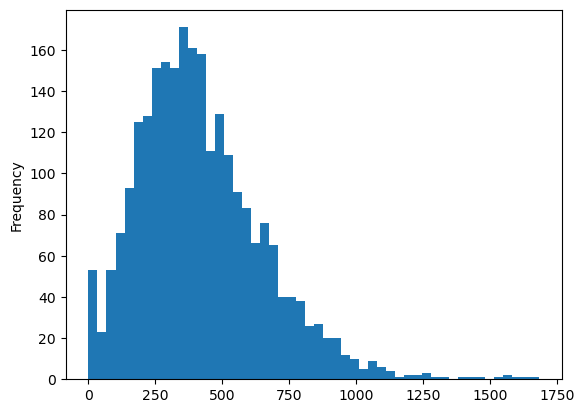

In [16]:
# plot this column as a historgram with 50 bins
df2['Low-Income'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

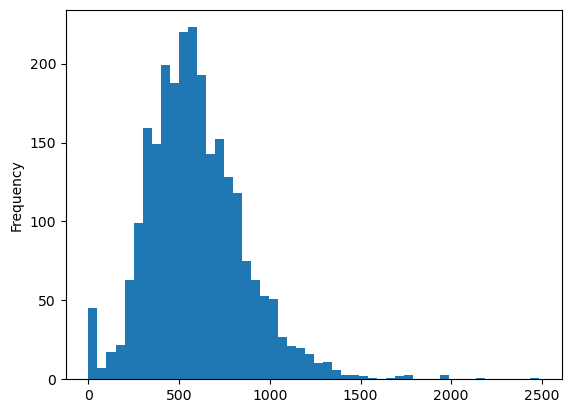

In [17]:
# plot this column as a historgram with 50 bins
df2['Middle-Income'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

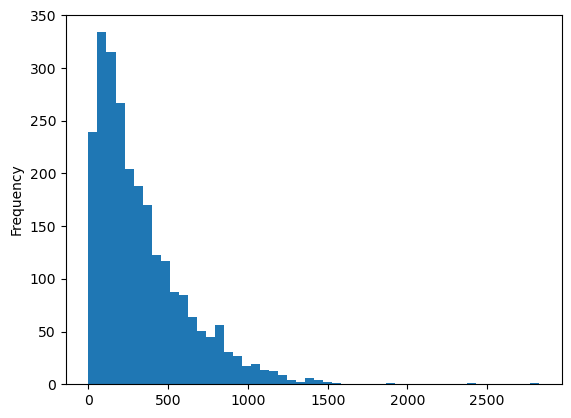

In [83]:
# plot this column as a historgram with 50 bins
df2['High-Income'].plot.hist(bins=50)

In [84]:
# define variable
df_sorted = df2.sort_values(by='Low-Income',ascending = False)

In [85]:
# display the first ten data
df_sorted[['FIPS','Low-Income']].head(10)

,FIPS,Low-Income
602,06037207502,1683
2026,06037576200,1637
2368,06037910501,1598
2239,06037700200,1580
836,06037234902,1553
2264,06037701902,1517
630,06037209300,1481
2329,06037900806,1446
2237,06037700101,1399
2063,06037600202,1342


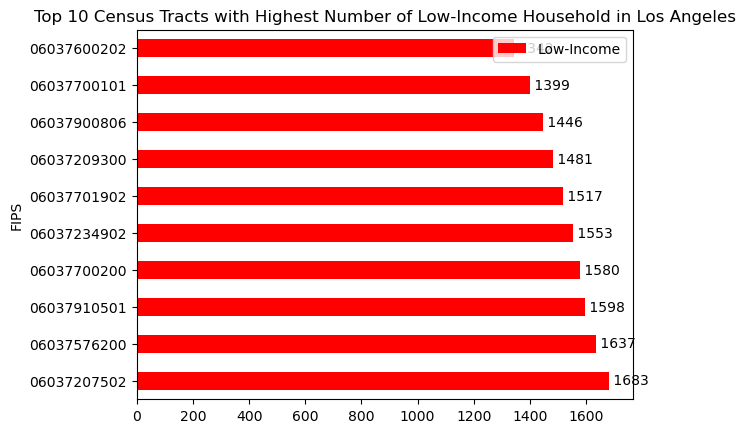

In [86]:
import matplotlib.pyplot as plt
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='Low-Income', 
                            title='Top 10 Census Tracts with Highest Number of Low-Income Household in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [1683, 1637, 1598, 1580, 1553, 1517, 1481, 1446, 1399, 1342]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.show()

In [87]:
# display the first ten data
df_sorted = df2.sort_values(by='Low-Income',ascending = False)
df_filtered = df_sorted[df_sorted['Low-Income'] != 0]
df_filtered[['FIPS', 'Low-Income']].tail(10)

,FIPS,Low-Income
2292,06037800328,20
1180,06037400208,18
2060,06037599100,16
2429,06037920110,16
2469,06037980011,12
2351,06037901218,9
2472,06037980014,6
2477,06037980019,5
1210,06037401901,5
117,06037115103,4


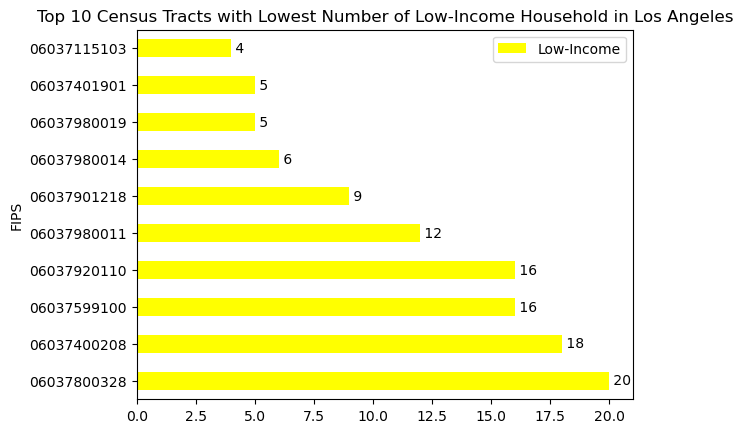

In [88]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='Low-Income', 
                            title='Top 10 Census Tracts with Lowest Number of Low-Income Household in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [20, 18, 16, 16, 12, 9, 6, 5, 5, 4]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [89]:
# define variable
df_sorted = df2.sort_values(by='Middle-Income',ascending = False)
# display the first ten data
df_sorted[['FIPS','Middle-Income']].head(10)

,FIPS,Middle-Income
2046,06037577300,2486
2278,06037702900,2167
2043,06037577000,1964
2240,06037700300,1963
606,06037207902,1952
2025,06037576001,1786
2044,06037577100,1780
2045,06037577200,1762
2266,06037702102,1713
2280,06037703003,1695


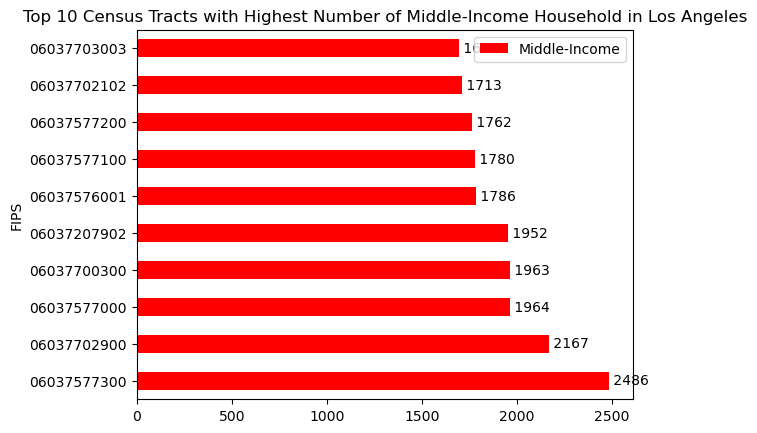

In [90]:
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='Middle-Income', 
                            title='Top 10 Census Tracts with Highest Number of Middle-Income Household in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [2486, 2167, 1964, 1963, 1952, 1786, 1780, 1762, 1713, 1695]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [91]:
# display the first ten data
df_sorted = df2.sort_values(by='Middle-Income',ascending = False)
df_filtered = df_sorted[df_sorted['Middle-Income'] != 0]
df_filtered[['FIPS', 'Middle-Income']].tail(10)

,FIPS,Middle-Income
2060,06037599100,24
2477,06037980019,22
589,06037206302,18
2468,06037980010,17
2475,06037980017,9
2482,06037980024,7
2487,06037980031,5
117,06037115103,4
2472,06037980014,4
2469,06037980011,4


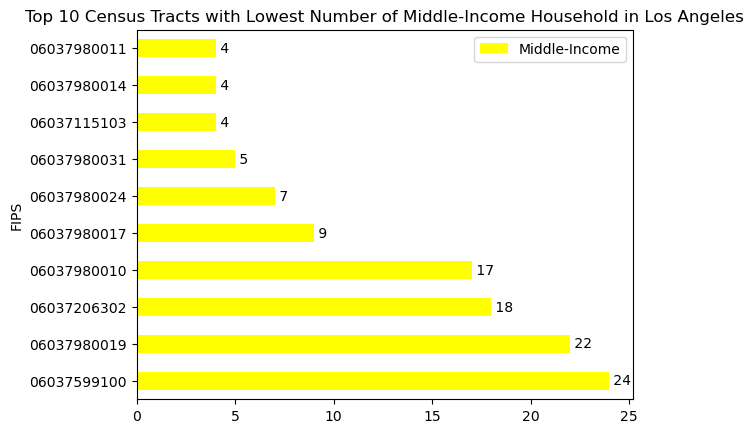

In [92]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='Middle-Income', 
                            title='Top 10 Census Tracts with Lowest Number of Middle-Income Household in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [24, 22, 18, 17, 9, 7, 5, 4, 4, 4]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [93]:
# define variable
df_sorted = df2.sort_values(by='High-Income',ascending = False)
# display the first ten data
df_sorted[['FIPS','High-Income']].head(10)

,FIPS,High-Income
1028,06037275604,2827
2278,06037702900,2412
69,06037108202,1879
2438,06037920121,1553
2165,06037620701,1490
2175,06037621104,1471
2255,06037701402,1443
606,06037207902,1441
1030,06037276000,1436
2401,06037920015,1425


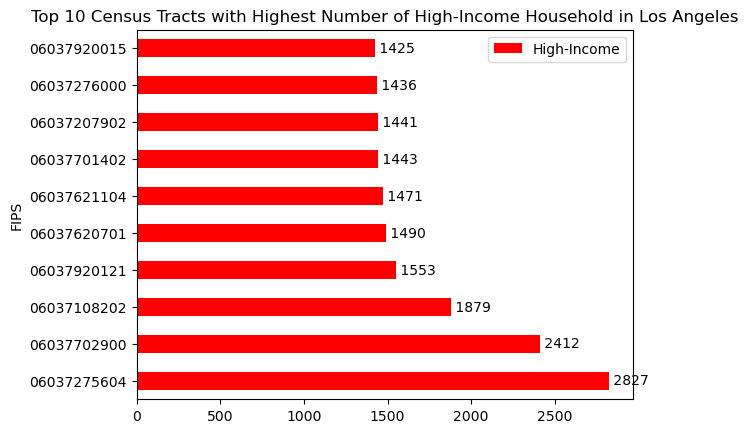

In [94]:
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='High-Income', 
                            title='Top 10 Census Tracts with Highest Number of High-Income Household in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [2827, 2412, 1879, 1553, 1490, 1471, 1443, 1441, 1436, 1425]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [95]:
# display the first ten data
df_sorted = df2.sort_values(by='High-Income',ascending = False)
df_filtered = df_sorted[df_sorted['High-Income'] != 0]
df_filtered[['FIPS', 'High-Income']].tail(10)

,FIPS,High-Income
902,06037242100,9
609,06037208301,8
846,06037236206,8
2321,06037900610,8
1687,06037532606,6
1971,06037571600,5
2475,06037980017,4
2479,06037980021,4
158,06037120030,4
2474,06037980016,2


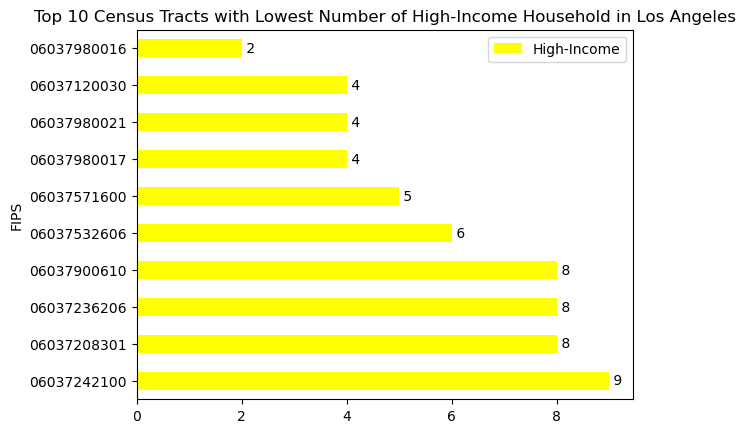

In [96]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='High-Income', 
                            title='Top 10 Census Tracts with Lowest Number of High-Income Household in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [9, 8, 8, 8, 6, 5, 4, 4, 4, 2]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In these figures, we can clear see which census tracks have most low/middle/high income household and least low/middle/high income household. And the exact number of household in each census tract.

## Plot Household Income Map
In this section, I want to plot the choropleth maps for each income category.

In [18]:
# read in a geojson file 
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

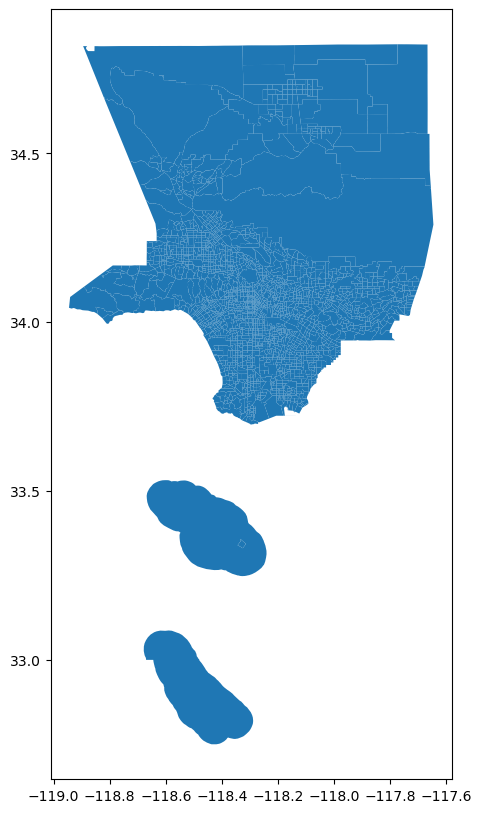

In [19]:
# plot it
tracts.plot(figsize=(12,10))

In [20]:
# info about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [21]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [22]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
# check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [24]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_income = tracts.merge(df2, on='FIPS')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_118/2312057885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [25]:
# check it
tracts_income.head()

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,528,723,300
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,198,695,490
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,464,614,271
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,667,595,162
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,525,316,87


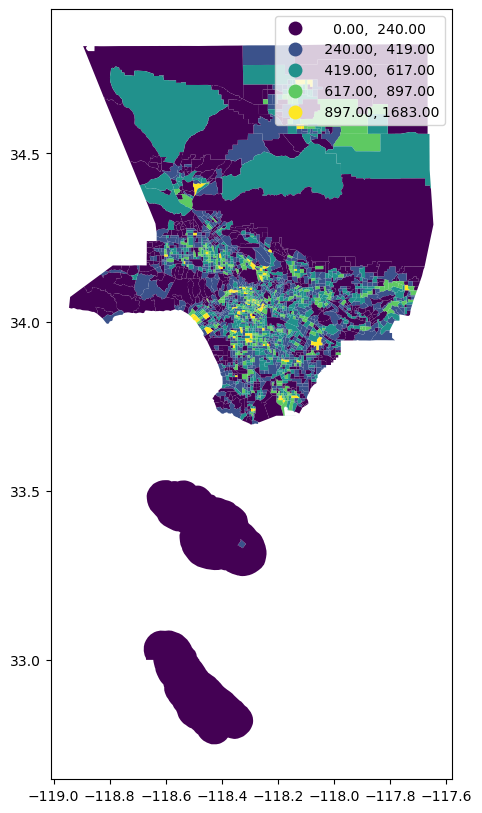

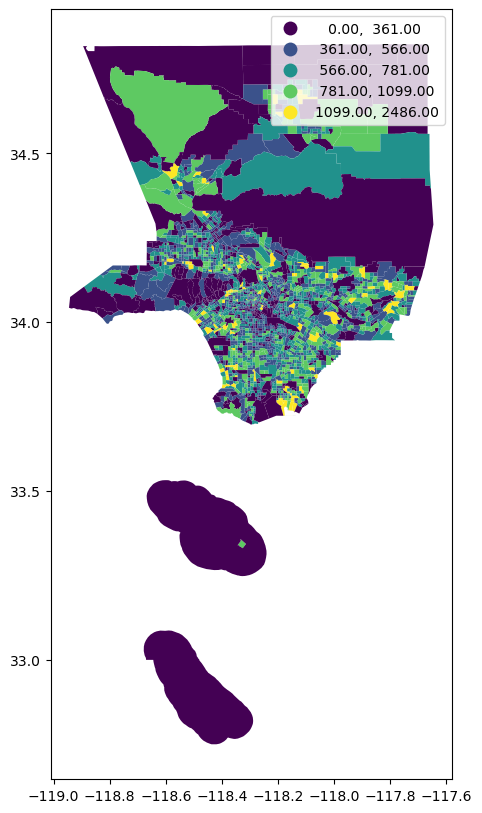

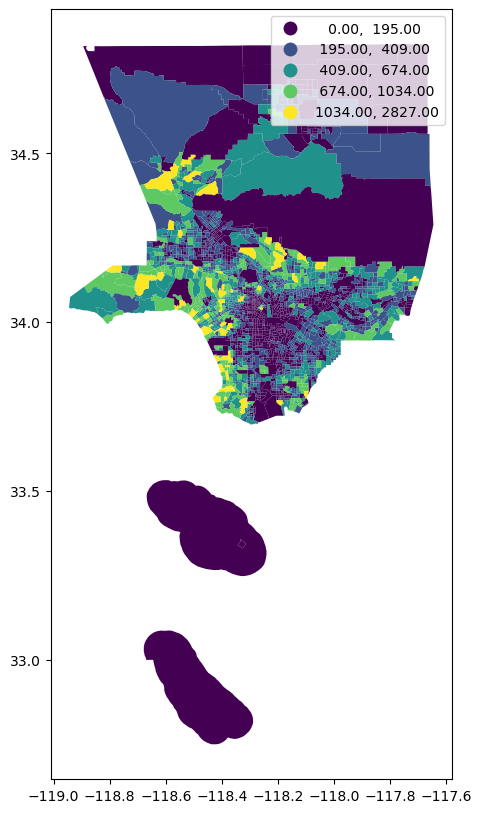

In [26]:
# create a list of routes
income_categories = ["Low-Income","Middle-Income","High-Income"]

for income in income_categories:
    
# create choropleth maps in geopandas
    tracts_income.plot(figsize=(12,10),
                     column=income,
                     legend=True, 
                     scheme='NaturalBreaks')

## Overlay Map
In this section, I will combine public transit accidents data and household income census data. And also visualize them on a map to analyze of whether the distribution of public traffic accidents is related to household income.

In [1]:
# import json
# import plotly.graph_objects as go
# import plotly.express as px
# tracts_income_geojson = json.loads(tracts_income.to_json())

# create a scatter mapbox plot
# fig = px.scatter_mapbox(gnew_data_trimmed, 
#                        lat="Latitude", 
#                        lon="Longitude", 
#                        color="Mode Name",
#                        labels={'Year':'Mode Name'},
#                        mapbox_style="carto-positron")

# add the geojosn 
# fig.add_trace(go.Choroplethmapbox(geojson=tracts_income_geojson,
#                                  locations=tracts_income.index,  
#                                  z=tracts_income['Low-Income'],  
#                                  colorscale="Viridis",  
#                                  marker_opacity=0.5,
#                                  marker_line_width=0))

# fig.update_layout(
#    width = 800,
#    height = 800,
#    title = "Public Transit Accidents Distribution on Number of Low-Income Household, 2018-2022",
#    title_x=0.5, 
#    legend=dict(
#        x=1.05, 
#        xanchor='right',
#        y=0.5
#    )
# )

# fig.show()

The notebook is too large to upload to github, markdown the overlay map code.

In [ ]:
# save map as html
fig.write_html("low_income_accidents.html")

For some reason, maybe too large, after running we cannot both save middle-income accidents map and high-income accidents map, so we delete these part of code. These code are the same as low-income overlay map, only need to change low-income to middle-income and high-income. But we still download the html file for middle-income and high-income overlay map. High-income households are mostly distributed in the bottom left, middle-income households are mostly distributed in the bottom right, and low-income households are mostly distributed in the bottom central. Public transportation accidents are also mostly concentrated in the central area, so we can conclude that public transit accident rates increase around low-income neighborhoods. But we are currently unable to derive more specific distribution characteristics and the relationship between the two. Next, we will select two representative communities based on traffic accident rates for further exploration. Find factors that influence the distribution of traffic accidents. 

To avoid the notebook to be too large, I delete the code about private vehicle traffic accidents on middle-income and high income map. The code should be the same as low-income. Due to the large amount of private vehicle traffic accident data from 2018 to 2022, it is difficult to directly find its distribution characteristics in the above map, and it is also difficult to figure out the relationship between the household income and the accident rate. But we can still conclude that a large proportion of private vehicle traffic accidents are distributed in central Los Angeles, which is consistent with the distribution of low-income household. We will further analyze the distribution characteristics by selecting specific communities later.